# Basic Statistics Case Study
## The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available. 

In [140]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
plt.style.use('ggplot')

import scipy.stats as stats

##                                Business Problem - 1

In [141]:
loan = pd.read_csv(r'Basic Hypothesis Testing/LoansData.csv')

In [142]:
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


### Data Audit

In [143]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [144]:
loan.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

### Data Cleaning

In [145]:
loan.columns=loan.columns.str.replace('.','_')
loan.head()

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_10028\2593157331.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan.columns=loan.columns.str.replace('.','_')


,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [146]:
loan.Interest_Rate=loan.Interest_Rate.str.replace('%',' ').apply(pd.to_numeric)

In [147]:
loan.Debt_To_Income_Ratio = loan.Debt_To_Income_Ratio.str.replace('%',' ').apply(pd.to_numeric)

In [148]:
loan.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

In [149]:
loan.describe(percentiles=np.arange(0,1,0.1))

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months
count,2499.000000,2499.000000,2498.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,13.065388,15.380420,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,4.177201,7.505052,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
0%,1000.000000,-0.010000,5.420000,0.000000,588.500000,2.000000,0.000000,0.000000
10%,4000.000000,3600.000000,7.620000,5.308000,2600.000000,5.000000,2298.800000,0.000000
20%,5440.000000,5000.000000,8.900000,8.516000,3250.000000,6.000000,4641.600000,0.000000
30%,7170.000000,6975.000000,10.740000,11.030000,3750.000000,7.000000,6560.800000,0.000000
40%,9000.000000,8799.232000,12.120000,13.182000,4333.330000,8.000000,8575.800000,0.000000
50%,10000.000000,10000.000000,13.110000,15.320000,5000.000000,9.000000,10948.000000,0.000000


In [150]:
loan=loan.drop(columns='Employment_Length')

In [151]:
loan.isna().sum()

Amount_Requested                  1
Amount_Funded_By_Investors        1
Interest_Rate                     2
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              1
State                             0
Home_Ownership                    1
Monthly_Income                    1
FICO_Range                        2
Open_CREDIT_Lines                 3
Revolving_CREDIT_Balance          3
Inquiries_in_the_Last_6_Months    3
dtype: int64

In [152]:
loan=loan.dropna()

In [153]:
loan['FICO_Score'] = ((loan.FICO_Range.str[0:3].astype(int))+(loan.FICO_Range.str[4:].astype(int)))/2

### a. Interest rate is varied for different loan amounts (Less interest charged for high loan amounts)

> Co-Relations (Pearson Co-efficient) as we have to find out the relationship between 2 continuous variables

In [154]:
stats.pearsonr(loan.Interest_Rate,loan.Amount_Funded_By_Investors)

PearsonRResult(statistic=0.33581940642785874, pvalue=1.1396807200473959e-66)

pvalue = 1.1396807200473959e-66 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. With 95 percent confidence interval, we can say that Interest rate is varied for different loan amounts.

### b. Loan length is directly effecting interest rate.

In [155]:
loan.Loan_Length.value_counts()

36 months    1941
60 months     548
Name: Loan_Length, dtype: int64

In [156]:
len_36mon=loan.query('Loan_Length=="36 months"').Interest_Rate
len_60mon=loan.query('Loan_Length=="60 months"').Interest_Rate

In [157]:
len_36mon.mean()

12.128907779495213

In [158]:
len_60mon.mean()

16.40746350364961

> We will perform the T-Test for independent two variable. As these are two different variable.

In [159]:
stats.ttest_ind(len_60mon,len_36mon)

Ttest_indResult(statistic=23.37963620691779, pvalue=1.9132344351585912e-109)

pvalue = 1.9132344351585912e-109,which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. With 95 percent confidence interval,we can say that loan is directly effecting interest rate.

### c. Interest rate varies for different purpose of loans

In [160]:
loan.Loan_Purpose.value_counts()

debt_consolidation    1301
credit_card            443
other                  199
home_improvement       152
major_purchase         101
small_business          86
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [161]:
debt_consolidation=loan.query('Loan_Purpose=="debt_consolidation"').Interest_Rate
credit_card=loan.query('Loan_Purpose=="credit_card"').Interest_Rate
other=loan.query('Loan_Purpose=="other"').Interest_Rate
home_improvement=loan.query('Loan_Purpose=="home_improvement"').Interest_Rate
major_purchase=loan.query('Loan_Purpose=="major_purchase"').Interest_Rate
small_business=loan.query('Loan_Purpose=="small_business"').Interest_Rate            
car=loan.query('Loan_Purpose=="car"').Interest_Rate
wedding=loan.query('Loan_Purpose=="wedding"').Interest_Rate
medical=loan.query('Loan_Purpose=="medical"').Interest_Rate
moving=loan.query('Loan_Purpose=="moving"').Interest_Rate
vacation=loan.query('Loan_Purpose=="vacation"').Interest_Rate
house=loan.query('Loan_Purpose=="house"').Interest_Rate
educational=loan.query('Loan_Purpose=="educational"').Interest_Rate
renewable_energy=loan.query('Loan_Purpose=="renewable_energy"').Interest_Rate 

> The one-way ANOVA tests the null hypothesis for two or more groups 

In [162]:
stats.f_oneway(debt_consolidation,credit_card,other,home_improvement,major_purchase,small_business,car,wedding,medical,moving,vacation,house,educational,renewable_energy)

F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

pvalue=1.1346364693350775e-14 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. With 95 percent confidence interval,we can say that interest rate varies for different purpose of loans.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [163]:
loan.Home_Ownership.value_counts()

MORTGAGE    1144
RENT        1140
OWN          200
OTHER          5
Name: Home_Ownership, dtype: int64

In [164]:
Mortgage=loan.query('Home_Ownership=="MORTGAGE"').FICO_Score
Rent=loan.query('Home_Ownership=="RENT"').FICO_Score
Own=loan.query('Home_Ownership=="OWN"').FICO_Score            
Other=loan.query('Home_Ownership=="OTHER"').FICO_Score

In [165]:
stats.f_oneway(Mortgage,Rent,Own,Other)

F_onewayResult(statistic=23.067768208374645, pvalue=1.001016973422469e-14)

pvalue=1.001016973422469e-14 which is less than 0.05 , so we can reject null hypothesis and accept alternate hypothesis. With 95 percent confidence interval,we can say that There is relationship between FICO scores and Home Ownership.

## BUSINESS PROBLEM - 2

### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.


In [166]:
price = pd.read_csv(r'Basic Hypothesis Testing/Price_Quotes.csv')

In [167]:
price

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


### Data Audit

In [168]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes


In [169]:
price.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

In [170]:
price.Barry_Price.mean()

124.33333333333333

In [171]:
price.Mary_Price.mean()

114.75

> We will perform the T-Test for independent two variable. as these are two different variable

In [172]:
stats.ttest_ind(price.Barry_Price,price.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

pvalue=0.17114226132118285 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that there is difference in the average price quotes provided by Mary and Barry with the help of this data .

### BUSINESS PROBLEM - 3

### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?


In [173]:
treat = pd.read_csv(r'Basic Hypothesis Testing/Treatment_Facility.csv')

In [174]:
treat

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


### Data Audit

In [175]:
treat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              20 non-null     int64  
 1   Reengineer         20 non-null     object 
 2   Employee_Turnover  20 non-null     float64
 3   VAR4               20 non-null     float64
 4   VAR5               20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 928.0+ bytes


In [176]:
treat.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
VAR4                 0
VAR5                 0
dtype: int64

In [177]:
treat = treat.rename(columns={'VAR4':'TRFF','VAR5':'CI'})

In [178]:
treat

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


### a. is there any effect in staff turnover

In [179]:
prior_turnover = treat.query('Reengineer=="Prior"').Employee_Turnover
post_turnover = treat.query('Reengineer=="Post"').Employee_Turnover

> We will perform the T-Test for independent two variable. as these are two different variable

In [180]:
stats.ttest_ind(prior_turnover,post_turnover)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

pvalue=0.09361109345535304 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that there is effect in staff turnover with this data.

### b. if the reengineering effort changed the critical incidence rate.

In [181]:
prior_CI = treat.query('Reengineer=="Prior"').CI
post_CI = treat.query('Reengineer=="Post"').CI

In [182]:
stats.ttest_ind(prior_CI,post_CI)

Ttest_indResult(statistic=1.627914425352865, pvalue=0.12091989189884148)

pvalue=0.12091989189884149 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that the reengineering effort changed the critical incidence rate with this data.

### BUSINESS PROBLEM - 4

### If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs,and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.

In [183]:
priority = pd.read_csv(r'Basic Hypothesis Testing/Priority_Assessment.csv')

In [184]:
priority

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [185]:
priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [186]:
priority.isna().sum()

Days        0
Priority    0
dtype: int64

In [187]:
High=priority.query('Priority=="High"').Days
Medium=priority.query('Priority=="Medium"').Days
Low=priority.query('Priority=="Low"').Days

In [188]:
stats.f_oneway(High,Medium,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

pvalue=0.16411459461716182 which is greater than 0.05, we cannot reject null hypothesis. With 95 percent confidence interval,we cannot say that that high priority jobs are completed more quickly than medium priority jobs, and medium priority jobs are completed more quickly than low priority jobs with the help of this data.

### BUSINESS PROBLEM - 5


In [189]:
films = pd.read_csv(r'Basic Hypothesis Testing/Films.csv')

In [190]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


### Data Audit

In [191]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [192]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

### Data Preparation

In [193]:
films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [194]:
films.Gender=np.where((films.Gender == 'Male') | (films.Gender == '1'),'Male','Female')

In [195]:
films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [196]:
films.Marital_Status=np.where((films.Marital_Status=='1') | (films.Marital_Status=='Married') ,"Married","Single" )

In [197]:
films.describe()

,_rowstate_,Sinage,Parking,Clean,Overall,Age,Income
count,330.0,328.000000,328.000000,327.000000,328.000000,328.000000,314.000000
mean,0.0,1.884146,1.756098,1.681957,1.618902,2.338415,1.834395
std,0.0,0.830603,0.798484,0.728313,0.689286,0.666902,0.844808
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,0.0,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000


In [198]:
for i in films.columns:
    films[i]=films[i].fillna(films[i].mode()[0])

In [199]:
films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

### BUSINESS PROBLEM:
###  What is the overall level of customer satisfaction?

In [200]:
mean=films.Overall.mean()

In [201]:
std=films.Overall.std()

In [202]:
se=std/(np.sqrt(films.shape[0]))

In [203]:
print(f'With 95% confidence levels,the overall level of customer satisfaction will be in the range ({mean-(1.96*SE)},{mean+(1.96*SE)})')

With 95% confidence levels,the overall level of customer satisfaction will be in the range (1.5469994901816928,1.6954247522425494)


### What factors are linked to satisfaction

In [204]:
films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [207]:
Willy_Wonka = films.query('Movie=="Willy Wonka"').Overall
Ferris_Buellers_Day_Off = films.query('Movie=="Ferris Buellers Day Off"').Overall
Old_School = films.query('Movie=="Old School"').Overall

In [208]:
stats.f_oneway(Willy_Wonka,Ferris_Buellers_Day_Off,Old_School)

F_onewayResult(statistic=1.335243752886233, pvalue=0.2645245972839759)

pvalue=0.2645245972839759 which is greater than 0.05,so, we cannot reject null hypothesis . With 95 percent confidence interval,we cannot say that Gender is a factor linked to satisfaction with this data.

In [211]:
stats.pearsonr(films.Parking,films.Overall)


PearsonRResult(statistic=0.5144289487855273, pvalue=1.0840276087789278e-23)

pvalue=1.0840276087789895e-23 ,,which is less than 0.05,so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Parking is a factor linked to satisfaction with this data.

In [213]:
stats.pearsonr(films.Clean,films.Overall)

PearsonRResult(statistic=0.3508222789070923, pvalue=5.437550007439627e-11)

pvalue=5.437550007439627e-11 ,,which is less than 0.05,so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data.pvalue=5.437550007439627e-11 ,,which is less than 0.05,so, we can reject null hypothesis . With 95 percent confidence interval,we can say that Clean is a factor linked to satisfaction with this data.

Therefore, parking and clean are factors linked to satisfaction.


### What is the demographic profile of Film on the Rocks patrons? 

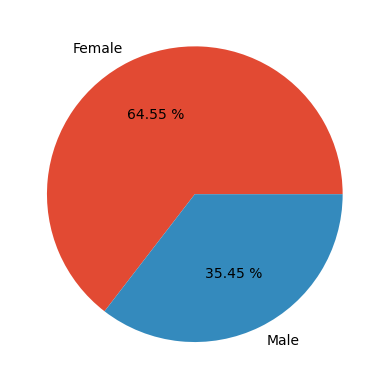

In [226]:
f = (((films.Gender.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(f.Gender,labels=f.index,autopct='%0.2f %%')
plt.show()

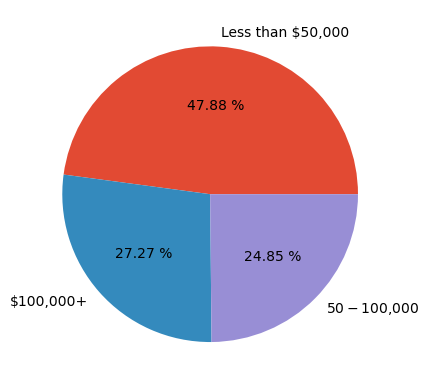

In [228]:
d=(((films.Income.value_counts())/(films.shape[0])*100)).reset_index().set_index('index')
plt.pie(d.Income,labels=['Less than $50,000','$100,000+','$50-$100,000'],autopct='%0.2f %%')
plt.show()

### In what media outlet(s) should the film series be advertised?

In [230]:
films.Hear_About.value_counts().reset_index().head(5)

,index,Hear_About
0,5,233
1,4,41
2,1,22
3,3,14
4,2,12


#### 5 means 'word of mouth'.And it is not a word of mouth.
#### And we can consider 4 i.e 'website'.So it should be advertised through website.